In [60]:
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
os.chdir('/Users/wyf/Downloads/titanic')
df = pd.read_csv('train.csv') 

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


only show the results of numerical features

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.shape

(891, 12)

In [7]:
duplicate_row_df = df[df.duplicated()]

In [8]:
print(duplicate_row_df)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


### 直接把所有能plot出histogram的数据都给出；单独指定某一列的话：df['column name'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x104867210>,
      dtype=object)

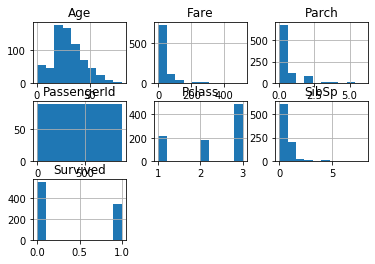

In [9]:
df.hist()

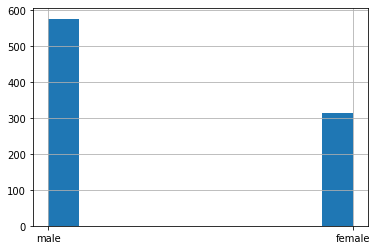

In [10]:
df['Sex'].hist()

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### suspect that unknown age are not survived

In [12]:
df1 = df[df['Age'].isnull()]

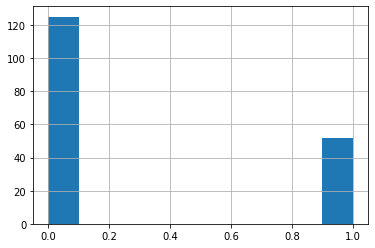

In [13]:
df1['Survived'].hist()

In [14]:
df2 = df[df['Cabin'].isnull()]

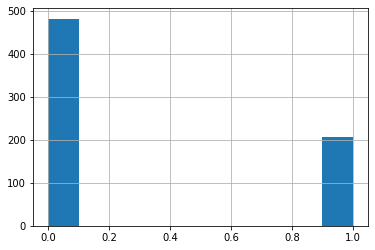

In [15]:
df2['Survived'].hist()

### the values in Cabin and Ticket are irregular, letter+number, have more than one value in one record. So first trial, drop this feature. as well as 'name'

In [43]:
df_ready = df.drop(['Cabin','PassengerId','Name','Ticket'], axis=1)

### Replace missing value in Age with mean

In [49]:
df_ready = df_ready.fillna(29.7)

### Convert nominal feature to numeric

In [46]:
df_ready['Sex'] = pd.factorize(df_ready.Sex)[0]
df_ready['Embarked'] = pd.factorize(df_ready.Embarked)[0]

### identify relationships between features 

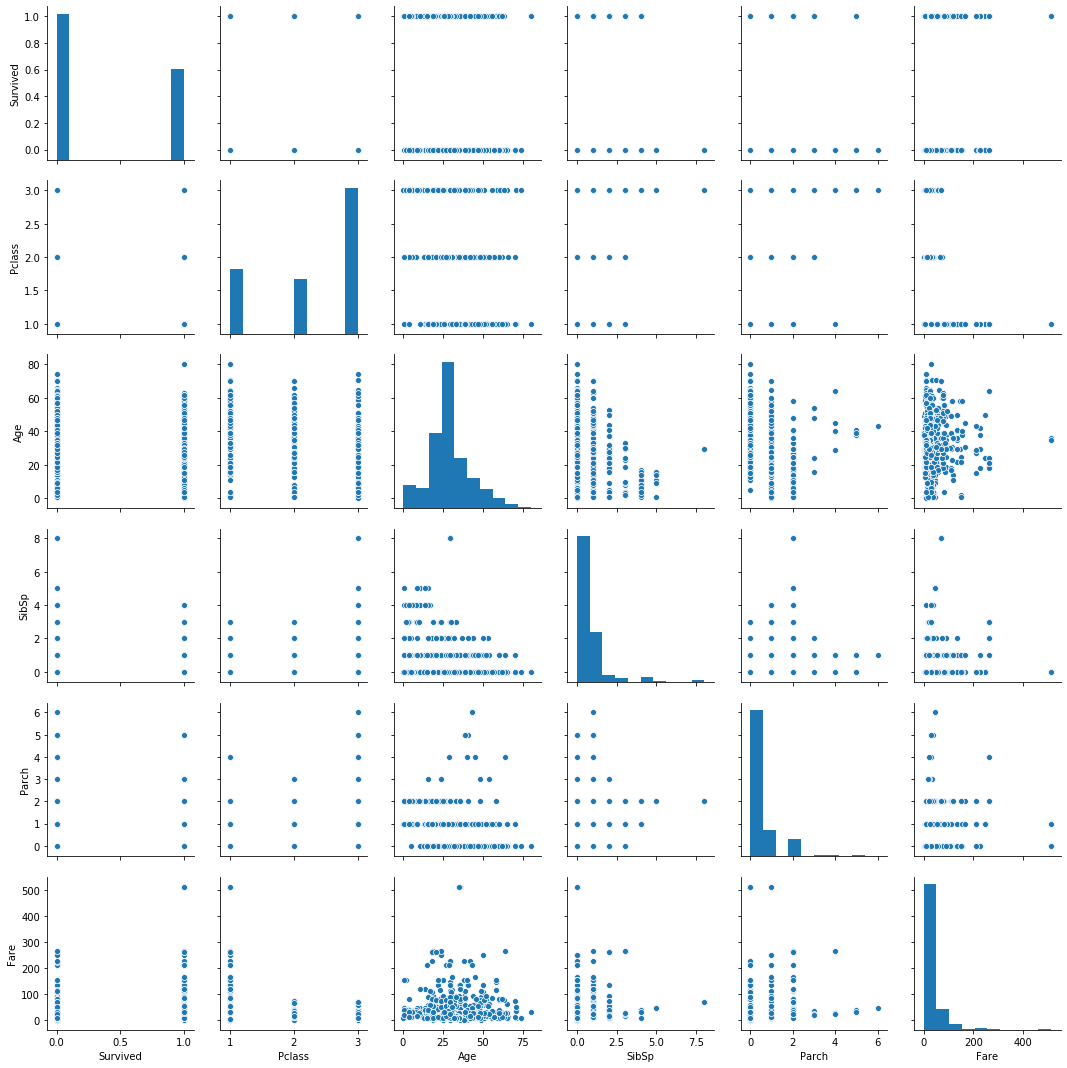

In [18]:
sns.pairplot(data=df_ready)

### train test split

In [50]:
x = df_ready.iloc[:,1:].values
y = df_ready["Survived"].values
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30,random_state=8)

In [52]:
classifier1 = DecisionTreeClassifier()
classifier1 = classifier1.fit(xtrain,ytrain)
prediction1 = classifier1.predict(xtest)
print(accuracy_score(ytest,prediction1))



0.7798507462686567


In [59]:
classifier2 = RandomForestClassifier()
classifier2 = classifier2.fit(xtrain,ytrain)
prediction2 = classifier2.predict(xtest)
print(accuracy_score(ytest,prediction2))

0.8059701492537313


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
classifier3 = KNeighborsClassifier()
classifier3 = classifier3.fit(xtrain,ytrain)
prediction3 = classifier3.predict(xtest)
print(accuracy_score(ytest,prediction3))

0.7052238805970149
